# Ex: Chi-squared - Effectiveness of a Drug Treatment

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [5]:
data = pd.read_csv("treatment.csv", index_col=0)

In [6]:
data.head()

,treatment,improvement
id,,
1,treated,improved
2,treated,improved
3,not-treated,improved
4,treated,improved
5,treated,not-improved


In [7]:
# contingency table:  Ho: Treatment and Improvement independent
table = pd.crosstab(data['treatment'], data['improvement'])
table

improvement,improved,not-improved
treatment,,
not-treated,26,29
treated,35,15


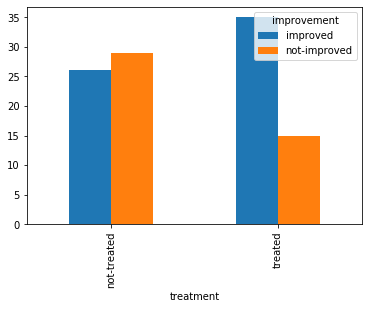

In [8]:
table.plot.bar()

In [9]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print('p=%.2f' % p)
print(expected)

dof=1
p=0.03
[[31.95238095 23.04761905]
 [29.04761905 20.95238095]]


In [10]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=3.841, stat=4.663


In [11]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [12]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.031
Dependent (reject H0)
